In [1]:
#필요한 모듈 import
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
#한글 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
# csv 데이터 
df = pd.read_csv('../data/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
df_proc = df.copy()
df_proc['total_count'] = df_proc['adults'].fillna(0) + df_proc['children'].fillna(0) + df_proc['babies'].fillna(0)
df_proc['total_day'] = df_proc['stays_in_weekend_nights'].fillna(0) + df_proc['stays_in_week_nights'].fillna(0)
df_proc['is_canceled'] = df_proc['is_canceled'].fillna(0)
df_proc['hotel'] = df_proc['hotel'].fillna(df['hotel'].mode())
df_proc = df_proc[['hotel','is_canceled','total_count','total_day']]
df_proc

,hotel,is_canceled,total_count,total_day
0,Resort Hotel,0,2.0,0
1,Resort Hotel,0,2.0,0
2,Resort Hotel,0,1.0,1
3,Resort Hotel,0,1.0,1
4,Resort Hotel,0,2.0,2
...,...,...,...,...
119385,City Hotel,0,2.0,7
119386,City Hotel,0,3.0,7
119387,City Hotel,0,2.0,7
119388,City Hotel,0,2.0,7


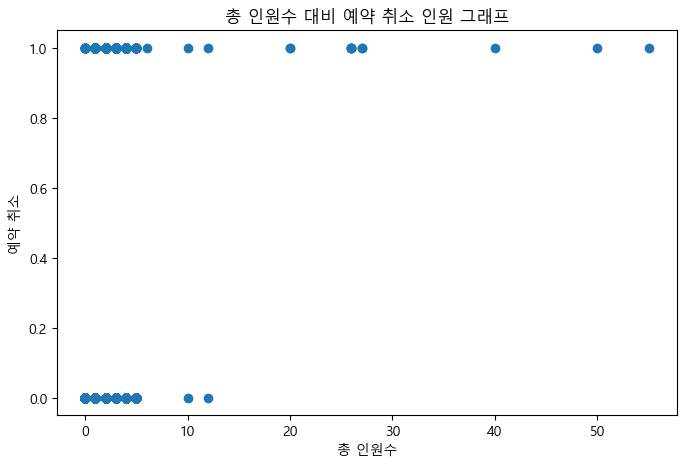

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df_proc['total_count'],  # x축에 들어갈 값
    df_proc['is_canceled']  # y축에 들어갈 값. x, y의 같은 index 위치에 점을 찍는다.

)

plt.title("총 인원수 대비 예약 취소 인원 그래프")
plt.xlabel("총 인원수")
plt.ylabel("예약 취소")

plt.show()

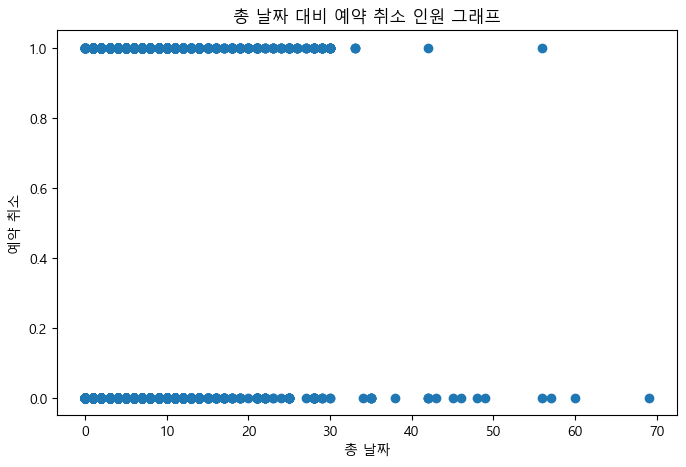

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df_proc['total_day'],  # x축에 들어갈 값
    df_proc['is_canceled']  # y축에 들어갈 값. x, y의 같은 index 위치에 점을 찍는다.

)

plt.title("총 날짜 대비 예약 취소 인원 그래프")
plt.xlabel("총 날짜")
plt.ylabel("예약 취소")

plt.show()

In [9]:
# 인코딩 pipeline
df_proc = df_proc.drop('is_canceled',axis=1)

num_cols = df_proc.select_dtypes(include=[np.number]).columns
cat_cols = df_proc.select_dtypes(include=['object']).columns

# ColumnTransformer 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

# 학습용 파이프라인 (모델까지 연결 가능)
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor)
])


df_proc = pipeline.fit_transform(df_proc)
df_proc

array([[ 0.        ,  1.        ,  0.04396711, -1.34037017],
       [ 0.        ,  1.        ,  0.04396711, -1.34037017],
       [ 0.        ,  1.        , -1.34032436, -0.94935232],
       ...,
       [ 1.        ,  0.        ,  0.04396711,  1.39675483],
       [ 1.        ,  0.        ,  0.04396711,  1.39675483],
       [ 1.        ,  0.        ,  0.04396711,  2.17879054]],
      shape=(119390, 4))

In [10]:
# train ,test 
X_train, X_test, y_train, y_test = train_test_split(
    df_proc, # input
    df['is_canceled'], # output 
    test_size=0.2, # testset의 비율. 
)

In [11]:
# # train , val
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, # train set
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=0
)

In [12]:
from sklearn.linear_model  import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
pred_train = model.predict(X_test)
accuracy = accuracy_score(y_test, pred_train)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.6285
